<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
address = "IR_phase2"
import sys
sys.path.append('/content/drive/My Drive/{}'.format(address))
%cd /content/drive/My\ Drive/$address

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IR_phase2


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.6 MB/s eta 0:00:00


In [ ]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammadali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammadali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv('./arxiv_data.csv')

In [ ]:
df

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']"
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,['cs.CV']


As it is obvious, the dataset has 2 sets of features: titles and summaries. The label here is the terms.

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [ ]:
#TODO


def single_label(row):
    if len(row[2].split(',')) == 1:
        return row[2][2: -2]
    else:
        return row[2].split(',')[0][2: -1]

df['new_col'] = df.apply(single_label, axis=1)


df

,titles,summaries,terms,new_col
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']",cs.CV
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']",cs.CV
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']",cs.CV
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],cs.CV
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']",cs.CV
...,...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']",stat.ML
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']",cs.CV
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']",stat.ML
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,['cs.CV'],cs.CV


In [ ]:
## Random Sampling to reduce size & label encoding

def lable_encoder(row):
    if row == 'cs.LG':
        return 0
    elif row =='cs.CV':
        return 1
    else:
        return 2

reduced_dataset = df.sample(n=20000, random_state=123)
reduced_dataset = reduced_dataset.drop(['terms'], axis=1)
reduced_dataset['label'] = reduced_dataset['new_col'].apply(lable_encoder)
reduced_dataset = reduced_dataset.drop(['new_col'], axis=1)
reduced_dataset

,titles,summaries,label
44148,R-VQA: Learning Visual Relation Facts with Sem...,"Recently, Visual Question Answering (VQA) has ...",1
36299,Scaling Up Robust MDPs by Reinforcement Learning,We consider large-scale Markov decision proces...,0
20823,Spectral clustering on spherical coordinates u...,Spectral clustering is a popular method for co...,2
24152,Uncovering the Folding Landscape of RNA Second...,Biomolecular graph analysis has recently gaine...,0
51659,Scaffold-based molecular design using graph ge...,Searching new molecules in areas like drug dis...,0
...,...,...,...
11608,OCT-GAN: Neural ODE-based Conditional Tabular ...,Synthesizing tabular data is attracting much a...,0
37869,FoodLogoDet-1500: A Dataset for Large-Scale Fo...,Food logo detection plays an important role in...,1
13674,Why Normalizing Flows Fail to Detect Out-of-Di...,Detecting out-of-distribution (OOD) data is cr...,2
14043,A Multi-criteria Approach for Fast and Outlier...,The problem of representative selection amount...,0


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [ ]:
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer

all_tokens_list = []

token_sentences = []

def single_label(row):
    return preprocess_text(row[0] + row[1])

reduced_dataset['all_token'] = reduced_dataset.apply(single_label, axis=1)

real_labels = []

# reduced_dataset
for index, row in reduced_dataset.iterrows():
    temp_str = ""
    for word in row['all_token']:
        all_tokens_list.append(word)
        temp_str += (word + " ")
    token_sentences.append(temp_str)
    real_labels.append(row['label'])

reduced_dataset

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammadali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,titles,summaries,label,all_token
44148,R-VQA: Learning Visual Relation Facts with Sem...,"Recently, Visual Question Answering (VQA) has ...",1,"[r-vqa, learning, visual, relation, facts, sem..."
36299,Scaling Up Robust MDPs by Reinforcement Learning,We consider large-scale Markov decision proces...,0,"[scaling, robust, mdps, reinforcement, learnin..."
20823,Spectral clustering on spherical coordinates u...,Spectral clustering is a popular method for co...,2,"[spectral, clustering, spherical, coordinates,..."
24152,Uncovering the Folding Landscape of RNA Second...,Biomolecular graph analysis has recently gaine...,0,"[uncovering, folding, landscape, rna, secondar..."
51659,Scaffold-based molecular design using graph ge...,Searching new molecules in areas like drug dis...,0,"[scaffold-based, molecular, design, using, gra..."
...,...,...,...,...
11608,OCT-GAN: Neural ODE-based Conditional Tabular ...,Synthesizing tabular data is attracting much a...,0,"[oct-gan, neural, ode-based, conditional, tabu..."
37869,FoodLogoDet-1500: A Dataset for Large-Scale Fo...,Food logo detection plays an important role in...,1,"[foodlogodet-1500, dataset, large-scale, food,..."
13674,Why Normalizing Flows Fail to Detect Out-of-Di...,Detecting out-of-distribution (OOD) data is cr...,2,"[normalizing, flows, fail, detect, out-of-dist..."
14043,A Multi-criteria Approach for Fast and Outlier...,The problem of representative selection amount...,0,"[multi-criteria, approach, fast, outlier-aware..."


In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns of dataframe
vectorizer = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')


X = vectorizer.fit_transform(token_sentences)
X_array = X.toarray()

terms = vectorizer.get_feature_names_out()



df_bow_sklearn = pd.DataFrame(data=X_array, columns=terms)

column_headers = list(df_bow_sklearn.columns.values)

remove_columns = []

for column_name in column_headers:
    if column_name not in all_tokens_list:
        remove_columns.append(column_name)

df_bow_sklearn = df_bow_sklearn.drop(remove_columns, axis=1)


In [ ]:
train_set = X_array[: int(0.8 * len(X_array))]
test_set = X_array[int(0.8 * len(X_array)):]

train_label = real_labels[: int(0.8 * len(real_labels))]
test_label = real_labels[int(0.8 * len(real_labels)):]

print(len(train_set))
print(len(test_set))
print(len(train_label))
print(len(test_label))

16000
4000
16000
4000


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = []
        self.alpha = alpha
        self.prior = {}
        
    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        num_of_all_docs = len(x)
        
        for class_label in [0, 1, 2]:
            self.prior[class_label] = real_labels.count(class_label) / num_of_all_docs

            all_docs_in_current_class = []
            for index, doc in enumerate(x):
                if real_labels[index] == class_label:  ## If the doc's class is equal to current_label
                    if len(all_docs_in_current_class) == 0:
                        all_docs_in_current_class = doc
                    else:
                        all_docs_in_current_class += doc
            total_class_vectors_with_smoothing = sum(all_docs_in_current_class) + len(terms)  #### Smoothing
            self.lk_word.append({})       

            for index, term in enumerate(terms):
                self.lk_word[class_label][term] = (all_docs_in_current_class[index] + 1) / total_class_vectors_with_smoothing
        
        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)

        '''
        predictions = []
        scores = np.asarray([[np.log(self.prior[class_label]) for class_label in [0, 1, 2]] for _ in range(len(x))])
        
        for k in range(len(x[0])):
            for class_label in [0, 1, 2]:
              current_term = terms[k]
              w = x[:, k] ### Doc tokens
              scores[:, class_label] += w * np.log(self.lk_word[class_label][current_term])
        predictions = np.argmax(scores, axis=1)
        return np.asarray([y for y in predictions])
    

In [ ]:
naive_bayes = NaiveBayes()
naive_bayes = naive_bayes.fit(train_set,train_label)

In [ ]:
pred_labels = naive_bayes.predict(test_set)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("The precision is (macro): " + str(precision_score(pred_labels, test_label, average='macro')))
print("The recall is (macro): " + str(recall_score(pred_labels, test_label, average='macro')))
print("The f1-score is (macro): " + str(f1_score(pred_labels, test_label, average='macro')))

print("The accuracy is: " + str(accuracy_score(pred_labels, test_label)))

print("The precision is (micro): " + str(precision_score(pred_labels, test_label, average='micro')))
print("The recall is (micro): " + str(recall_score(pred_labels, test_label, average='micro')))
print("The f1-score is (micro): " + str(f1_score(pred_labels, test_label, average='micro')))


The precision is (macro): 0.7511300311473854
The recall is (macro): 0.7201807798812818
The f1-score is (macro): 0.7324432005108815
The accuracy is: 0.85725
The precision is (micro): 0.85725
The recall is (micro): 0.85725
The f1-score is (micro): 0.85725


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

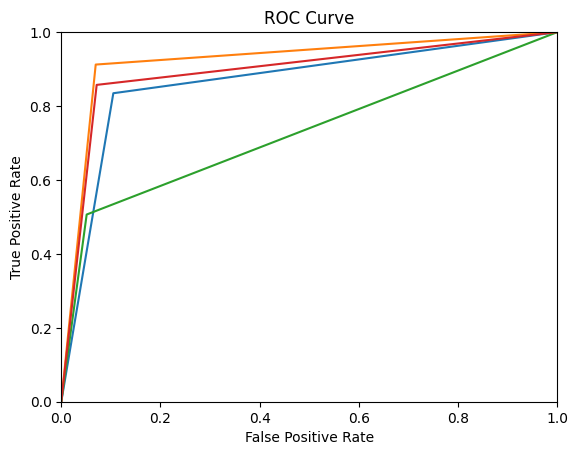

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

encode_labels = []

for class_predicted in test_label:
    if class_predicted == 0:
        encode_labels.append([1, 0, 0])
    elif class_predicted == 1:
        encode_labels.append([0, 1, 0])
    elif class_predicted == 2:
        encode_labels.append([0, 0, 1])

encode_labels = np.array(encode_labels)

predicted_label_probabilty = []

for class_predicted in pred_labels:
    if class_predicted == 0:
        predicted_label_probabilty.append([1, 0, 0])
    elif class_predicted == 1:
        predicted_label_probabilty.append([0, 1, 0])
    elif class_predicted == 2:
        predicted_label_probabilty.append([0, 0, 1])

predicted_label_probabilty = np.array(predicted_label_probabilty)


false_positive = {}
true_positive = {}
roc_auc = {}
for class_index in [0, 1, 2]:
    false_positive[class_index], true_positive[class_index], _ = roc_curve(encode_labels[:, class_index], predicted_label_probabilty[:, class_index])
    roc_auc[class_index] = roc_auc_score(encode_labels[:, class_index], predicted_label_probabilty[:, class_index])

false_positive_micro, true_positive_micro, _ = roc_curve(encode_labels.ravel(), predicted_label_probabilty.ravel())
roc_auc_micro = roc_auc_score(encode_labels, predicted_label_probabilty, average='micro')

plt.figure()
for class_index in [0, 1, 2]:
    plt.plot(false_positive[class_index], true_positive[class_index])

plt.plot(false_positive_micro, true_positive_micro)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Explanation
This curve shows the performance of a classification model in different thresholds. Ideally, the curves must be closer to the top-left of the chart to have a good performance (this way, they have more tpr with respect to fpr, so they act more accurately). The more the curves get closer to y = x line, the worse they classify samples. The chart above shows that our model is working just fine and it's close enough to the top left.

#### The 4 curves indicate 1 curve for each label, and 1 curve for the average.

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

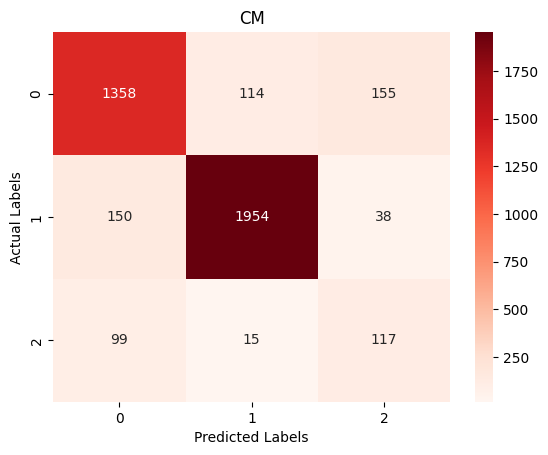

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix(y_true, y_pred, labels):
    matrix = [[0 for x in range(len(labels))] for y in range(len(labels))]  ## building the boilerplate matrix

    for true_label, pred_label in zip(y_true, y_pred):
        true_index = labels.index(true_label)
        pred_index = labels.index(pred_label)
        matrix[true_index][pred_index] += 1

    matrix = np.array(matrix)

    sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("CM")
    plt.xticks(np.arange(len(labels)) + 0.5, labels)
    plt.yticks(np.arange(len(labels)) + 0.5, labels)

    plt.show()

confusion_matrix(test_label, pred_labels, np.unique(test_label).tolist())

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [ ]:
!pip install fasttext
!pip install torch
!pip3 install Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
address = "IR_phase2"
import sys
sys.path.append('/content/drive/My Drive/{}'.format(address))
%cd /content/drive/My\ Drive/$address

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IR_phase2


In [ ]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [ ]:
# read data

df = pd.read_csv('./arxiv_data.csv')

In [ ]:
# perform data cleaning and eda (you can add cells here)

df = df.dropna(axis='index', how='any')
df['terms'] = df['terms'].apply(lambda x: eval(x))
df['category'] = df['terms'].apply(lambda x: x[0])


In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    processed_tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        processed_tokens = [word for word in processed_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        processed_tokens = [word for word in processed_tokens if word not in string.punctuation]

    if lower_case:
        processed_tokens = [word.lower() for word in processed_tokens if len(word) > minimum_length]
    else:
        processed_tokens = [word for word in processed_tokens if len(word) > minimum_length]

    return processed_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [ ]:
# preprocess text
nltk.download('punkt')
nltk.download('stopwords')
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [ ]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with open('FastText_train.txt', 'w', encoding='utf-8') as file:
            file.write('\n'.join(list(map(lambda doc: ' '.join(doc), texts))))
        self.model = fasttext.train_unsupervised('FastText_train.txt', self.method, minn=2, maxn=6, wordNgrams=10,)
        os.remove('FastText_train.txt')

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        # todo
        if self.preprocessor:
            query = self.preprocessor(query)
        if type(query) == str:
            query = query.split()
        tf_idf_embed = tf_idf_vectorizer.transform([' '.join(query)]).toarray()[0]
        weights = []
        vocab_weights_list = [tf_idf_embed[tf_idf_vectorizer.vocabulary_[word]] for word in query if word in tf_idf_vectorizer.vocabulary_]
        min_weight = min(vocab_weights_list) if len(vocab_weights_list) > 0 else 1
        for word in query:
            if word in tf_idf_vectorizer.vocabulary_:
                weight = tf_idf_embed[tf_idf_vectorizer.vocabulary_[word]]
            else:
                weight = min_weight
            weights.append(weight)  
        weights = np.array(weights)
        query_embed = np.mean([self.model.get_word_vector(query[i])* weights[i] for i in range(len(query))], axis=0)
        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(preprocessed_total, mode='train', save=True)
# FastText_model.prepare(preprocessed_total, mode='load')

In [ ]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.8945679664611816, 'covid19'),
 (0.8614505529403687, 'covid-19'),
 (0.791479766368866, 'dr-covid'),
 (0.7566500902175903, 'pandemic'),
 (0.7533419728279114, 'admissions'),
 (0.7446073889732361, 'infections'),
 (0.7395049929618835, 'infects'),
 (0.7393304705619812, 'admission'),
 (0.7391563057899475, 'readmission'),
 (0.7390950322151184, 'pandemics')]

In [ ]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        mapped_data = map(lambda doc: ' '.join(doc), data)
        converted_to_list = list(mapped_data)
        self.vectorizer.fit(converted_to_list)
        

In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_total)

In [ ]:
text =  "backpropagation is good"
TF_IDF_model.vectorizer.transform([' '.join(text)])
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 0.29603055,  0.02651952,  0.04250801, -0.16476452, -0.2977104 ,
        0.13270022,  0.01113383,  0.06026059, -0.17201568,  0.04313473,
        0.04562896,  0.34943128,  0.02470933, -0.00194801, -0.04402972,
       -0.05269418,  0.10839772,  0.01486019,  0.14503519, -0.20066604,
       -0.13612206, -0.00394514,  0.03154065, -0.04962732, -0.19313045,
       -0.19904283,  0.11616668, -0.06911454, -0.01203505, -0.00362016,
        0.02841762, -0.15141219, -0.16593328, -0.16575941, -0.08993924,
        0.13742808,  0.0670087 ,  0.15664867,  0.03226576, -0.19336054,
       -0.0611754 ,  0.22538003,  0.21916704, -0.01639393, -0.09185334,
       -0.24699578, -0.17993039,  0.04189714, -0.05343926,  0.09702109,
        0.12840132,  0.01388739,  0.08289533,  0.15817676,  0.17811093,
        0.08386323,  0.20216976,  0.11276618,  0.14116225,  0.13532144,
       -0.04717796,  0.11131621,  0.22103359, -0.05018561, -0.05561785,
       -0.44146815,  0.05640554,  0.10805812,  0.16065909,  0.08


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [ ]:
# todo
embeddings = [FastText_model.get_query_embedding(' '.join(text), TF_IDF_model.vectorizer) for text in tqdm(preprocessed_total)]

100%|██████████| 51774/51774 [03:19<00:00, 259.46it/s]


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [ ]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.dataset_labels = labels
        self.embeddings = embeddings
        
    def __len__(self):
        return len(self.dataset_labels)

    def __getitem__(self, i):
        return self.embeddings[i], self.dataset_labels[i]


In [ ]:
# calculate the labels
dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset = dataset.dropna(axis='index', how='any')
all_categories = set([sublist for sublist in df['category']])
all_category_classes = {x: i for i, x in enumerate(all_categories)}

dataset['category_encoded'] = dataset['category'].apply(lambda x: all_category_classes[x])
labels = dataset['category_encoded'].to_numpy()

In [ ]:
# todo split the data into train, val, test and create dataloaders

# X_train_set, X_test_set, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
# X_val_set, X_test_set, y_val, y_test = train_test_split(X_test_set, y_test, test_size=0.5, random_state=42)


# train_loader = DataLoader(dataset = PapersDataSet(X_train_set, y_train), batch_size=32, shuffle=True)
# val_loader = DataLoader(dataset = PapersDataSet(X_val_set, y_val), batch_size=64, shuffle=False)
# test_loader = DataLoader(dataset = PapersDataSet(X_test_set, y_test), batch_size=64, shuffle=False)


X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


train_loader = DataLoader(dataset= PapersDataSet(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(dataset= PapersDataSet(X_val, y_val), batch_size=64, shuffle=False)
test_loader = DataLoader(dataset= PapersDataSet(X_test, y_test), batch_size=64, shuffle=False)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):

        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 50),
            nn.BatchNorm1d(50),
            nn.LeakyReLU(),
            nn.Linear(50, 25),
            nn.BatchNorm1d(25),
            nn.LeakyReLU(),
            nn.Dropout(p=0.15),
            nn.Linear(25, 8),
            nn.BatchNorm1d(8),
            nn.Tanh(), 
            nn.Dropout(p=0.1),
            nn.Linear(8, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):

        return self.seq(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [ ]:
# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    # todo
    epoch_true = 0
    epoch_all = 0
    eval_loss = 0
    predicted_labels = []
    true_labels = []

    

    with torch.no_grad(), tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for i, (x, label) in pbar:
            x = x.to(device)
            label = label.to(device)
            predicted = model(x)

            loss = criterion(predicted, label)

            eval_loss += loss.item()

            predictions = predicted.argmax(-1)
            epoch_all += len(predictions)
            epoch_true += (predictions == label).sum()
            true_labels.extend(label)
            predicted_labels.extend(predictions)
            discription = 'Validation' if not test_mode else 'Test'
            pbar.set_description(f'{discription} Acc: {epoch_true * 100. / epoch_all:.2f}%')

    predicted_labels = [_.item() for _ in predicted_labels]
    true_labels = [_.item() for _ in true_labels]
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            # todo
            pass
            x = x.to(device)
            label = label.to(device)
            predicted = model(x)

            loss = criterion(predicted, label)
            
            train_loss += loss.item()

            predictions = predicted.argmax(-1)
            
            epoch_all += len(predictions)
            epoch_true += (predictions == label).sum()

            pbar.set_description(f'Training Acc: {epoch_true * 100. / epoch_all:.2f}%')
            loss.backward()

            optimizer.step()
            optimizer.zero_grad() 
  
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")
    



Validation Acc: 65.42%: 100%|██████████| 81/81 [00:00<00:00, 327.03it/s]


Epoch 1 finished in 6.58s
[Epoch 1]	Train Loss: 0.0332	Validation Loss: 0.0146	 F1 score macro: 0.4935443677913476


Validation Acc: 77.55%: 100%|██████████| 81/81 [00:00<00:00, 298.98it/s]


Epoch 2 finished in 6.39s
[Epoch 2]	Train Loss: 0.0281	Validation Loss: 0.0127	 F1 score macro: 0.5558262497613481


Validation Acc: 80.70%: 100%|██████████| 81/81 [00:00<00:00, 337.54it/s]


Epoch 3 finished in 6.62s
[Epoch 3]	Train Loss: 0.0253	Validation Loss: 0.0115	 F1 score macro: 0.5737664088026048


Validation Acc: 82.15%: 100%|██████████| 81/81 [00:00<00:00, 325.01it/s]


Epoch 4 finished in 6.26s
[Epoch 4]	Train Loss: 0.0232	Validation Loss: 0.0108	 F1 score macro: 0.5773039248500379


Validation Acc: 82.96%: 100%|██████████| 81/81 [00:00<00:00, 292.70it/s]


Epoch 5 finished in 6.44s
[Epoch 5]	Train Loss: 0.0217	Validation Loss: 0.0099	 F1 score macro: 0.5797187125244064


Validation Acc: 83.74%: 100%|██████████| 81/81 [00:00<00:00, 334.76it/s]


Epoch 6 finished in 6.17s
[Epoch 6]	Train Loss: 0.0204	Validation Loss: 0.0094	 F1 score macro: 0.5819870285066003


Validation Acc: 83.58%: 100%|██████████| 81/81 [00:00<00:00, 299.57it/s]


Epoch 7 finished in 8.00s
[Epoch 7]	Train Loss: 0.0194	Validation Loss: 0.0090	 F1 score macro: 0.572823190706864


Validation Acc: 84.14%: 100%|██████████| 81/81 [00:00<00:00, 161.99it/s]


Epoch 8 finished in 6.50s
[Epoch 8]	Train Loss: 0.0186	Validation Loss: 0.0086	 F1 score macro: 0.5783731551940007


Validation Acc: 84.45%: 100%|██████████| 81/81 [00:00<00:00, 322.19it/s]


Epoch 9 finished in 6.67s
[Epoch 9]	Train Loss: 0.0179	Validation Loss: 0.0082	 F1 score macro: 0.5814075818764022


Validation Acc: 84.32%: 100%|██████████| 81/81 [00:00<00:00, 296.46it/s]


Epoch 10 finished in 6.28s
[Epoch 10]	Train Loss: 0.0174	Validation Loss: 0.0081	 F1 score macro: 0.5773996522564961


Validation Acc: 84.43%: 100%|██████████| 81/81 [00:00<00:00, 294.84it/s]


Epoch 11 finished in 6.37s
[Epoch 11]	Train Loss: 0.0170	Validation Loss: 0.0079	 F1 score macro: 0.5780674002605493


Validation Acc: 84.78%: 100%|██████████| 81/81 [00:00<00:00, 347.13it/s]


Epoch 12 finished in 6.49s
[Epoch 12]	Train Loss: 0.0165	Validation Loss: 0.0076	 F1 score macro: 0.5791341221192204


Validation Acc: 84.72%: 100%|██████████| 81/81 [00:00<00:00, 316.80it/s]


Epoch 13 finished in 6.43s
[Epoch 13]	Train Loss: 0.0162	Validation Loss: 0.0074	 F1 score macro: 0.5802249991154053


Validation Acc: 84.82%: 100%|██████████| 81/81 [00:00<00:00, 312.52it/s]


Epoch 14 finished in 6.44s
[Epoch 14]	Train Loss: 0.0159	Validation Loss: 0.0073	 F1 score macro: 0.5799021219270087


Validation Acc: 84.91%: 100%|██████████| 81/81 [00:00<00:00, 103.53it/s]


Epoch 15 finished in 6.80s
[Epoch 15]	Train Loss: 0.0157	Validation Loss: 0.0072	 F1 score macro: 0.5803943884716699


Validation Acc: 84.99%: 100%|██████████| 81/81 [00:00<00:00, 279.74it/s]


Epoch 16 finished in 6.34s
[Epoch 16]	Train Loss: 0.0156	Validation Loss: 0.0072	 F1 score macro: 0.5817367172564575


Validation Acc: 84.91%: 100%|██████████| 81/81 [00:00<00:00, 323.30it/s]


Epoch 17 finished in 6.39s
[Epoch 17]	Train Loss: 0.0153	Validation Loss: 0.0070	 F1 score macro: 0.5802212986201194


Validation Acc: 84.80%: 100%|██████████| 81/81 [00:00<00:00, 297.03it/s]


Epoch 18 finished in 6.41s
[Epoch 18]	Train Loss: 0.0151	Validation Loss: 0.0069	 F1 score macro: 0.5761544588400508


Validation Acc: 85.05%: 100%|██████████| 81/81 [00:00<00:00, 340.71it/s]


Epoch 19 finished in 6.33s
[Epoch 19]	Train Loss: 0.0149	Validation Loss: 0.0069	 F1 score macro: 0.5810038246337829


Validation Acc: 84.84%: 100%|██████████| 81/81 [00:00<00:00, 350.10it/s]


Epoch 20 finished in 6.16s
[Epoch 20]	Train Loss: 0.0149	Validation Loss: 0.0068	 F1 score macro: 0.5790158917842193


Validation Acc: 84.95%: 100%|██████████| 81/81 [00:00<00:00, 294.99it/s]


Epoch 21 finished in 6.30s
[Epoch 21]	Train Loss: 0.0147	Validation Loss: 0.0067	 F1 score macro: 0.580265633612766


Validation Acc: 85.15%: 100%|██████████| 81/81 [00:00<00:00, 322.65it/s]


Epoch 22 finished in 6.63s
[Epoch 22]	Train Loss: 0.0147	Validation Loss: 0.0067	 F1 score macro: 0.5822871887859487


Validation Acc: 85.15%: 100%|██████████| 81/81 [00:00<00:00, 341.60it/s]


Epoch 23 finished in 6.41s
[Epoch 23]	Train Loss: 0.0145	Validation Loss: 0.0067	 F1 score macro: 0.5819458071153655


Validation Acc: 85.17%: 100%|██████████| 81/81 [00:00<00:00, 298.47it/s]


Epoch 24 finished in 6.41s
[Epoch 24]	Train Loss: 0.0144	Validation Loss: 0.0066	 F1 score macro: 0.5817494291453658


Validation Acc: 85.38%: 100%|██████████| 81/81 [00:00<00:00, 328.30it/s]


Epoch 25 finished in 6.13s
[Epoch 25]	Train Loss: 0.0145	Validation Loss: 0.0066	 F1 score macro: 0.5812231296498447


Validation Acc: 85.22%: 100%|██████████| 81/81 [00:00<00:00, 317.13it/s]


Epoch 26 finished in 6.50s
[Epoch 26]	Train Loss: 0.0143	Validation Loss: 0.0066	 F1 score macro: 0.5827557872543493


Validation Acc: 84.97%: 100%|██████████| 81/81 [00:00<00:00, 333.03it/s]


Epoch 27 finished in 6.58s
[Epoch 27]	Train Loss: 0.0141	Validation Loss: 0.0065	 F1 score macro: 0.5773657702303064


Validation Acc: 85.28%: 100%|██████████| 81/81 [00:00<00:00, 344.03it/s]


Epoch 28 finished in 6.19s
[Epoch 28]	Train Loss: 0.0141	Validation Loss: 0.0065	 F1 score macro: 0.5826861289235911


Validation Acc: 85.40%: 100%|██████████| 81/81 [00:00<00:00, 317.54it/s]


Epoch 29 finished in 6.45s
[Epoch 29]	Train Loss: 0.0141	Validation Loss: 0.0065	 F1 score macro: 0.5813053880479109


Validation Acc: 85.20%: 100%|██████████| 81/81 [00:00<00:00, 328.40it/s]


Epoch 30 finished in 6.21s
[Epoch 30]	Train Loss: 0.0140	Validation Loss: 0.0064	 F1 score macro: 0.579439040193722


Validation Acc: 85.26%: 100%|██████████| 81/81 [00:00<00:00, 366.39it/s]


Epoch 31 finished in 6.30s
[Epoch 31]	Train Loss: 0.0139	Validation Loss: 0.0064	 F1 score macro: 0.5803061328801538


Validation Acc: 84.78%: 100%|██████████| 81/81 [00:00<00:00, 331.17it/s]


Epoch 32 finished in 6.40s
[Epoch 32]	Train Loss: 0.0138	Validation Loss: 0.0065	 F1 score macro: 0.57784303798651


Validation Acc: 85.42%: 100%|██████████| 81/81 [00:00<00:00, 95.75it/s]


Epoch 33 finished in 7.11s
[Epoch 33]	Train Loss: 0.0137	Validation Loss: 0.0063	 F1 score macro: 0.5836884032059508


Validation Acc: 84.91%: 100%|██████████| 81/81 [00:00<00:00, 314.77it/s]


Epoch 34 finished in 6.58s
[Epoch 34]	Train Loss: 0.0136	Validation Loss: 0.0064	 F1 score macro: 0.5789011743171241


Validation Acc: 85.40%: 100%|██████████| 81/81 [00:00<00:00, 313.06it/s]


Epoch 35 finished in 6.20s
[Epoch 35]	Train Loss: 0.0137	Validation Loss: 0.0063	 F1 score macro: 0.5813430906178944


Validation Acc: 85.28%: 100%|██████████| 81/81 [00:00<00:00, 297.88it/s]


Epoch 36 finished in 6.47s
[Epoch 36]	Train Loss: 0.0137	Validation Loss: 0.0063	 F1 score macro: 0.5803921727026925


Validation Acc: 85.22%: 100%|██████████| 81/81 [00:00<00:00, 319.94it/s]


Epoch 37 finished in 6.41s
[Epoch 37]	Train Loss: 0.0136	Validation Loss: 0.0063	 F1 score macro: 0.5801941665606306


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 370.00it/s]


Epoch 38 finished in 6.23s
[Epoch 38]	Train Loss: 0.0135	Validation Loss: 0.0062	 F1 score macro: 0.5827665495793151


Validation Acc: 85.32%: 100%|██████████| 81/81 [00:00<00:00, 330.88it/s]


Epoch 39 finished in 6.48s
[Epoch 39]	Train Loss: 0.0135	Validation Loss: 0.0062	 F1 score macro: 0.5807731455180843


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 319.22it/s]


Epoch 40 finished in 6.20s
[Epoch 40]	Train Loss: 0.0134	Validation Loss: 0.0062	 F1 score macro: 0.5832595710211544


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 288.74it/s]


Epoch 41 finished in 6.84s
[Epoch 41]	Train Loss: 0.0134	Validation Loss: 0.0062	 F1 score macro: 0.5825130365232862


Validation Acc: 85.28%: 100%|██████████| 81/81 [00:00<00:00, 303.59it/s]


Epoch 42 finished in 6.34s
[Epoch 42]	Train Loss: 0.0133	Validation Loss: 0.0063	 F1 score macro: 0.5812449859577743


Validation Acc: 85.49%: 100%|██████████| 81/81 [00:00<00:00, 303.92it/s]


Epoch 43 finished in 6.51s
[Epoch 43]	Train Loss: 0.0134	Validation Loss: 0.0063	 F1 score macro: 0.5829870123215123


Validation Acc: 85.42%: 100%|██████████| 81/81 [00:00<00:00, 313.63it/s]


Epoch 44 finished in 6.54s
[Epoch 44]	Train Loss: 0.0133	Validation Loss: 0.0062	 F1 score macro: 0.5832291725703562


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 316.56it/s]


Epoch 45 finished in 6.30s
[Epoch 45]	Train Loss: 0.0133	Validation Loss: 0.0062	 F1 score macro: 0.5825108335821524


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 317.89it/s]


Epoch 46 finished in 7.69s
[Epoch 46]	Train Loss: 0.0133	Validation Loss: 0.0061	 F1 score macro: 0.5825682168157491


Validation Acc: 85.51%: 100%|██████████| 81/81 [00:00<00:00, 315.10it/s]


Epoch 47 finished in 6.60s
[Epoch 47]	Train Loss: 0.0131	Validation Loss: 0.0062	 F1 score macro: 0.5828205945005446


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 349.25it/s]


Epoch 48 finished in 6.42s
[Epoch 48]	Train Loss: 0.0132	Validation Loss: 0.0061	 F1 score macro: 0.583073749442622


Validation Acc: 85.34%: 100%|██████████| 81/81 [00:00<00:00, 315.51it/s]


Epoch 49 finished in 6.63s
[Epoch 49]	Train Loss: 0.0130	Validation Loss: 0.0061	 F1 score macro: 0.5827528596426046


Validation Acc: 85.53%: 100%|██████████| 81/81 [00:00<00:00, 344.20it/s]


Epoch 50 finished in 6.38s
[Epoch 50]	Train Loss: 0.0130	Validation Loss: 0.0061	 F1 score macro: 0.5851930327084343


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

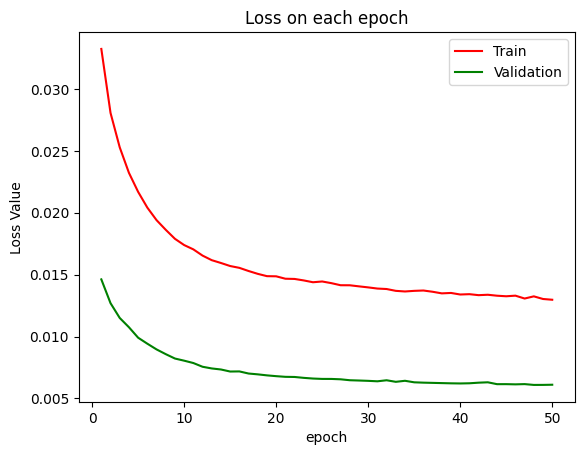

In [ ]:
# todo: plot the train and validation loss by epoch
each_epoch = [_ + 1 for _ in range(num_epochs)]
plt.plot(each_epoch, train_loss_arr, color='r', label='Train')
plt.plot(each_epoch, val_loss_arr, color='g', label='Validation')
plt.title('Loss on each epoch')
plt.ylabel('Loss Value')
plt.xlabel('epoch')
plt.legend()
plt.show() 

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

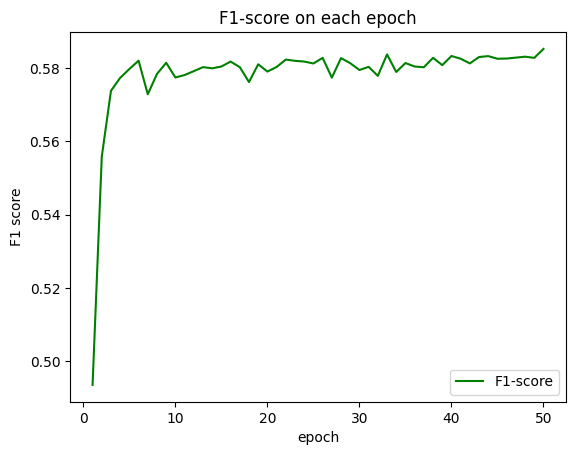

In [ ]:
# todo: plot the f1 score by epoch 
each_epoch = [X + 1 for X in range(num_epochs)]
plt.plot(each_epoch, f1_macro_scores, color='g', label='F1-score')
plt.title('F1-score on each epoch')
plt.ylabel('F1 score')
plt.xlabel('epoch')
plt.legend()
plt.show() 

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# todo: evaluate the model on the test set
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
print(f'Loss: {eval_loss / len(test_loader.dataset)}')


Test Acc: 86.11%: 100%|██████████| 81/81 [00:00<00:00, 295.16it/s]


Loss: 0.005978952375283431


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("The precision is (macro): " + str(precision_score(predicted_labels, true_labels, average='macro')))
print("The recall is (macro): " + str(recall_score(predicted_labels, true_labels, average='macro')))
print("The f1-score is (macro): " + str(f1_score(predicted_labels, true_labels, average='macro')))

print("The accuracy is: " + str(accuracy_score(predicted_labels, true_labels)))

print("The precision is (micro): " + str(precision_score(predicted_labels, true_labels, average='micro')))
print("The recall is (micro): " + str(recall_score(predicted_labels, true_labels, average='micro')))
print("The f1-score is (micro): " + str(f1_score(predicted_labels, true_labels, average='micro')))

The precision is (macro): 0.6107761001877133
The recall is (macro): 0.9051290044885696
The f1-score is (macro): 0.5912314333981133
The accuracy is: 0.8611432985708768
The precision is (micro): 0.8611432985708768
The recall is (micro): 0.8611432985708768
The f1-score is (micro): 0.8611432985708768


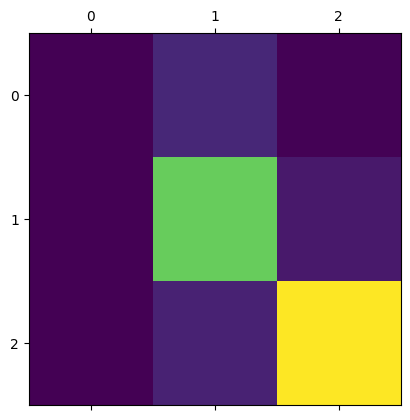

In [ ]:
from sklearn.metrics import confusion_matrix

 
cm = confusion_matrix(true_labels,predicted_labels)

plt.matshow(cm)

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
class_decoder = {
    0: 'cs.CV',
    1: 'cs.LG',
    2: 'stat.ML'
}
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    query_embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    output = model(torch.from_numpy(query_embedding).to(device).unsqueeze(0))


    predicted_label = output.argmax(-1).item()
    predicted_class_code = class_decoder[predicted_label]
    return predicted_class_code


In [ ]:
predict('hardware and computerc architecture is good')

'cs.LG'

In [ ]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [1]:
# !pip install transformers
!pip install --upgrade accelerate
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.4 MB/s eta 0:00:00


In [2]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
address = "IR_phase2"
import sys
sys.path.append('/content/drive/My Drive/{}'.format(address))
%cd /content/drive/My\ Drive/$address

Mounted at /content/drive
/content/drive/My Drive/IR_phase2


In [4]:
# read data
df = pd.read_csv('./arxiv_data.csv')

In [5]:
# perform data cleaning and eda (you can add cells here)
# todo
df = df.dropna(axis='index', how='any')
df['terms'] = df['terms'].apply(lambda x: eval(x))
df['category'] = df['terms'].apply(lambda x: x[0])

In [6]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    processed_tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        processed_tokens = [word for word in processed_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        processed_tokens = [word for word in processed_tokens if word not in string.punctuation]

    if lower_case:
        processed_tokens = [word.lower() for word in processed_tokens if len(word) > minimum_length]
    else:
        processed_tokens = [word for word in processed_tokens if len(word) > minimum_length]

    return processed_tokens

In [7]:
# preprocess text
nltk.download('punkt')
nltk.download('stopwords')
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,titles,summaries,terms,category,preprocessed_abstract,preprocessed_title
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"[cs.CV, cs.LG]",cs.CV,"[stereo, matching, one, widely, used, techniqu...","[survey, semantic, stereo, matching, semantic,..."
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"[cs.CV, cs.AI, cs.LG]",cs.CV,"[recent, advancements, artificial, intelligenc...","[future-ai, guiding, principles, consensus, re..."
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","[cs.CV, cs.AI]",cs.CV,"[paper, proposed, novel, mutual, consistency, ...","[enforcing, mutual, consistency, hard, regions..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,[cs.CV],cs.CV,"[consistency, training, proven, advanced, semi...","[parameter, decoupling, strategy, semi-supervi..."
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","[cs.CV, cs.LG]",cs.CV,"[ensure, safety, automated, driving, correct, ...","[background-foreground, segmentation, interior..."


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [8]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test

random_state = 1


dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset = dataset.dropna(axis='index', how='any')

classes_set = {'cs.LG', 'stat.ML', 'cs.CV'}
classes_dict = {}

for index, item in enumerate(classes_set):
  classes_dict[item] = index


dataset['labels_encoded'] = dataset['category'].apply(lambda x: classes_dict[x])
labels = dataset['labels_encoded'].to_numpy()
titles = [' '.join(x) for x in dataset['preprocessed_title']]
abstracts = [' '.join(x) for x in dataset['preprocessed_abstract']]
X_text = [titles[i] + ' ' + abstracts[i] for i in range(len(titles))]

pairs = list(zip(X_text, labels))
pairs = random.sample(pairs, 10000)  
X_text, labels = zip(*pairs) 

X_train, X_test, y_train, y_test = train_test_split(X_text, labels, test_size=0.2, random_state=random_state)


## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [9]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# you can add more cells here if you need
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(classes_dict)).to(device)
model_2 = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(classes_dict)).to(device)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [10]:
# todo
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [11]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

In [13]:
# todo
# fine tune bert and train model

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,            # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)


trainer = Trainer(
    model=model,                      # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
)

trainer.train()

Step,Training Loss
10,1.063500
20,1.032100
30,0.971100
40,0.891400
50,0.872700
60,0.834600
70,0.775900
80,0.707300
90,0.608600
100,0.625300


TrainOutput(global_step=1500, training_loss=0.3754089136123657, metrics={'train_runtime': 1439.9995, 'train_samples_per_second': 16.667, 'train_steps_per_second': 1.042, 'total_flos': 4057702239024000.0, 'train_loss': 0.3754089136123657, 'epoch': 3.0})

In [14]:
# todo
# freeze bert weights and then train model_2
for name, param in model_2.named_parameters():
    if 'classifier' in name:
        param.requires_grad = True # only classifier update
    else:
        param.requires_grad = False # tied other layer

training_args = TrainingArguments(
    output_dir='./results_2',          
    num_train_epochs = 3,            
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,   
    warmup_steps=500,               
    weight_decay=0.01,               
    logging_dir='./logs_2',            
    logging_steps=10,
)

trainer = Trainer(
    model=model_2,                      
    args=training_args,                 
    train_dataset=train_dataset,         
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
10,1.258700
20,1.257300
30,1.253100
40,1.218500
50,1.225500
60,1.202900
70,1.169600
80,1.193600
90,1.184500
100,1.134900


TrainOutput(global_step=1500, training_loss=0.8874030036926269, metrics={'train_runtime': 566.7175, 'train_samples_per_second': 42.349, 'train_steps_per_second': 2.647, 'total_flos': 4057702239024000.0, 'train_loss': 0.8874030036926269, 'epoch': 3.0})

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [15]:
# you can add more cells here if you need
# todo
y_pred_transformers = []
y_pred_transformers_2 = []

for x in tqdm(X_test):
    _input = tokenizer(x, truncation=True, padding=True, return_tensors='pt').to(device)
    output = model(**_input)
    output_2 = model_2(**_input)
    y_pred_transformers.append(output[0].softmax(1).argmax().item())
    y_pred_transformers_2.append(output_2[0].softmax(1).argmax().item())

100%|██████████| 2000/2000 [01:29<00:00, 22.44it/s]


Metrics for the first model: 
The precision is (macro): 0.6724245769985787
The recall is (macro): 0.7968204696515319
The f1-score is (macro): 0.6905290864516548
The accuracy is: 0.898
The precision is (micro): 0.898
The recall is (micro): 0.898
The f1-score is (micro): 0.898

Metrics for the second model: 
The precision is (macro): 0.37376125098826246
The recall is (macro): 0.40417271535742555
The f1-score is (macro): 0.3376273964974197
The accuracy is: 0.5965
The precision is (micro): 0.5965
The recall is (micro): 0.5965
The f1-score is (micro): 0.5965


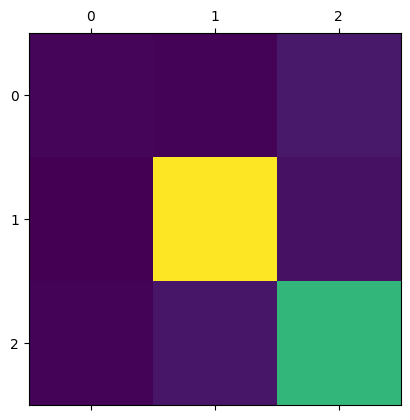

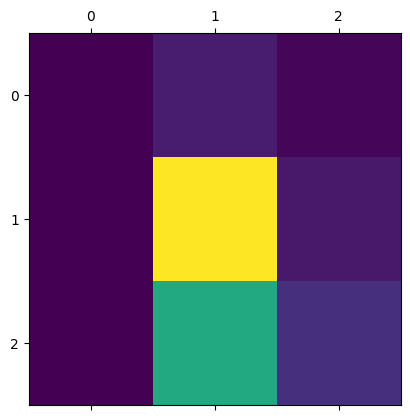

In [19]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


print("Metrics for the first model: ")
print("The precision is (macro): " + str(precision_score(y_pred_transformers, y_test, average='macro')))
print("The recall is (macro): " + str(recall_score(y_pred_transformers, y_test, average='macro')))
print("The f1-score is (macro): " + str(f1_score(y_pred_transformers, y_test, average='macro')))

print("The accuracy is: " + str(accuracy_score(y_pred_transformers, y_test)))

print("The precision is (micro): " + str(precision_score(y_pred_transformers, y_test, average='micro')))
print("The recall is (micro): " + str(recall_score(y_pred_transformers, y_test, average='micro')))
print("The f1-score is (micro): " + str(f1_score(y_pred_transformers, y_test, average='micro')))
cm = confusion_matrix(y_test,y_pred_transformers)
plt.matshow(cm)

print()
print("Metrics for the second model: ")
print("The precision is (macro): " + str(precision_score(y_pred_transformers_2, y_test, average='macro')))
print("The recall is (macro): " + str(recall_score(y_pred_transformers_2, y_test, average='macro')))
print("The f1-score is (macro): " + str(f1_score(y_pred_transformers_2, y_test, average='macro')))

print("The accuracy is: " + str(accuracy_score(y_pred_transformers_2, y_test)))

print("The precision is (micro): " + str(precision_score(y_pred_transformers_2, y_test, average='micro')))
print("The recall is (micro): " + str(recall_score(y_pred_transformers_2, y_test, average='micro')))
print("The f1-score is (micro): " + str(f1_score(y_pred_transformers_2, y_test, average='micro')))
cm = confusion_matrix(y_test,y_pred_transformers_2)
plt.matshow(cm)

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [22]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    class_decoder = {
    0: 'cs.CV',
    1: 'stat.ML',
    2: 'cs.LG'
    }
    normalized_query = ' '.join(preprocess_text(x))
    _input = tokenizer(normalized_query, truncation=True, padding=True, return_tensors='pt').to(device)
    output = model(**_input)
    predicted_label = output[0].softmax(1).argmax().item()
    predicted_class_code = class_decoder[predicted_label]
    return predicted_class_code

In [23]:
predict('hardware is very good.', model)

'cs.LG'

In [24]:
# It is highly recommended to save your final models
torch.save(model.state_dict(), 'model.pt')

In [26]:

torch.save(model_2.state_dict(), 'model_2.pt')

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
address = "IR_phase2"
import sys
sys.path.append('/content/drive/My Drive/{}'.format(address))
%cd /content/drive/My\ Drive/$address

Mounted at /content/drive
/content/drive/My Drive/IR_phase2


In [25]:
import string
import nltk
import csv
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
def clean_data(text, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):

    processed_tokens = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        processed_tokens = [word for word in processed_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        processed_tokens = [word for word in processed_tokens if word not in string.punctuation]

    if lower_case:
        processed_tokens = [word.lower() for word in processed_tokens]
    else:
        processed_tokens = [word for word in processed_tokens]

    return processed_tokens


def find_stop_words(all_text : list[str], dictionary: dict, num_token=30):
    dictionary = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    stop_words = {}
    for i in range(0, num_token):
        stop_words[dictionary[i][0]] = dictionary[i][1]
    return stop_words


all_strings = []
with open('./arxiv_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    dictionary = {}   # term:frequency
    for row in csv_reader:
        title = clean_data(row[0])
        abstract = clean_data(row[1])
        all_strings.append(title)
        all_strings.append(abstract)

        for word in title + abstract:
            if dictionary.__contains__(word):
                dictionary[word] += 1
            else:
                dictionary[word] = 1
csv_file.close()
list_of_stop_words = find_stop_words(all_strings, dictionary)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = []
import pandas as pd

with open('./arxiv_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    positional_indices = {}
    for index, row in enumerate(csv_reader):

        title_tokens = clean_data(row[0])
        abstract_tokens = clean_data(row[1])
        corpus.append({"id": index, "title_token": title_tokens, "abs_token": abstract_tokens,})
csv_file.close()


def get_posting_for_one_doc(tokens):
    posting = {}
    position = 0
    for token in tokens:
        if posting.__contains__(token):
            posting.get(token).append(position)
        else:
            posting[token] = [position]
        position += 1
    return posting


def construct_positional_indexes(corpus : list):
    for item in corpus:

        for word, posting in get_posting_for_one_doc(item["abs_token"]).items():
            if list_of_stop_words.__contains__(word):
                continue
            if not positional_indices.__contains__(word):
                positional_indices[word] = [[], []]
            positional_indices.get(word)[1].append([item["id"], posting])

        for word, posting in get_posting_for_one_doc(item["title_token"]).items():
            if not positional_indices.__contains__(word):
                positional_indices[word] = [[], []]
            positional_indices.get(word)[0].append([item["id"], posting])
    return positional_indices

positional_indices = construct_positional_indexes(corpus)
df = pd.read_csv('./arxiv_data.csv')
def get_posting_list(word : str):
    output_dict = {}
    list_of_posting_lists = positional_indices[word]
    for item in list_of_posting_lists:     
        for ordered_tuple in item:
            output_dict[ordered_tuple[0]] = ordered_tuple[1]
    return output_dict

df = df.dropna(axis='index', how='any')
df['terms'] = df['terms'].apply(lambda x: eval(x))
df['category'] = df['terms'].apply(lambda x: x[0])
labels = df['category'].to_numpy()

In [ ]:
from collections import defaultdict
import numpy as np

abstract_idf = defaultdict(dict)
title_idf = defaultdict(dict)
classes = np.unique(labels)


title_tokens = []
abstract_tokens = []

for item in corpus:
  for token in item['title_token']:
    title_tokens.append(token) 
  for token in item['abs_token']:
    abstract_tokens.append(token) 


for title_term in title_tokens:
    if positional_indices.__contains__(token):
      for posting in positional_indices.get(token)[0]:
        doc_id = posting[0]
        # term_doc_frequency = len(posting[1])
        if title_term in title_idf[labels[doc_id]].keys():
            title_idf[labels[doc_id]][title_term] += 1
        else:
            title_idf[labels[doc_id]][title_term] = 1

        if title_term in title_idf['all'].keys():
            title_idf['all'][title_term] += 1
        else:
            title_idf['all'][title_term] = 1

for abs_term in abstract_tokens:
    if positional_indices.__contains__(token):
      for posting in positional_indices.get(token)[0]:
        doc_id = posting[0]
        # term_doc_frequency = len(posting[1])
        if abs_term in abstract_idf[labels[doc_id]].keys():
            abstract_idf[labels[doc_id]][abs_term] += 1
        else:
            abstract_idf[labels[doc_id]][abs_term] = 1

        if abs_term in abstract_idf['all'].keys():
            abstract_idf['all'][abs_term] += 1
        else:
            abstract_idf['all'][abs_term] = 1




KeyboardInterrupt: ignored

In [ ]:
import pickle


# save dictionary to person_data.pkl file
with open('title_idf_data.pkl', 'wb') as fp:
    pickle.dump(title_idf, fp)
    print('dictionary saved successfully to file')

with open('abstract_idf_data.pkl', 'wb') as fp:
    pickle.dump(abstract_idf, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file
dictionary saved successfully to file


In [ ]:
import pickle

file_to_read = open("title_idf_data.pkl", "rb")

title_idf = pickle.load(file_to_read)


file_to_read = open("abstract_idf_data.pkl", "rb")

abstract_idf = pickle.load(file_to_read)

In [ ]:
title_average_idf = {'all': 7.247885038822575, 'cs.CV': 7.4757481940144475, 'cs.LG': 6.996723049491591, 'stat.ML': 6.840177960301164}
abstract_average_idf = {'all': 110.26013056746629, 'cs.CV': 113.0364755702644, 'cs.LG': 107.70960435641656, 'stat.ML': 101.67282683093771}

In [ ]:
import numpy as np
def tokenize(list_word):
    tokenize_list = {}
    for word in list_word:
        if tokenize_list.__contains__(word):
            tokenize_list[word] += 1
        else:
            tokenize_list[word] = 1
    return tokenize_list

def strID_to_intID(rows):
    dictionary = {}
    counter = 0
    for row_id in range(len(rows)):
        dictionary[rows[row_id][0]] = counter + 1
    return dictionary

def get_posting_for_doc(word,doc_id):
    l = positional_indices.get(word)[1]
    for posting in l:
        if posting[0] == doc_id:
            return posting
        elif posting[0] > doc_id:
            return None


def construct_full_corpus():
    full_corpus = {}
    with open('./arxiv_data.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        rows = list(csv_reader)
        for index, row in enumerate(rows):
            full_corpus[index] = {"title": row[0], "abstract": row[1]}
    csv_file.close()

    return full_corpus


def cosine_normalization(w):
    w = np.ones(w.shape)
    tmp = np.sqrt(np.sum(w))
    return np.sqrt(np.sum(w)) / tmp

In [ ]:
import math
from collections import Counter
def ltn_lnn (title_query: str, abstract_query: str, max_result_count: int = 10, weight: float = 0.5, category='all'):
    N = 0
    for label in labels:
        if label == category or category == 'all':
            N += 1 

    no_title, no_abstract = False, False
    if title_query != "":
        pass
    else:
        no_title = True

    if abstract_query != "":
        pass
    else:
        no_abstract = True


    title_tokens = tokenize(clean_data(title_query))
    abs_tokens = tokenize(clean_data(abstract_query))
    score =  {}

    if not no_title:
        for token in title_tokens:
            if positional_indices.__contains__(token):
                term_frequency = len(positional_indices.get(token)[0])
                idf = 0
                if term_frequency!=0:
                    idf = log(6000 / term_frequency)
                term_query_frequency = title_tokens.get(token)
                for posting in positional_indices.get(token)[0]:
                    doc_id = posting[0]
                    term_doc_frequency = len(posting[1])
                    if score.__contains__(doc_id):
                        score[doc_id] += (1 + math.log(term_doc_frequency)) * (1 + math.log(term_query_frequency)) * math.log(N / title_idf[category][token]) * weight
                    else:
                        score[doc_id] = (1 + math.log(term_doc_frequency)) * (1 + math.log(term_query_frequency)) * math.log(N / title_idf[category][token]) * weight
    max_idf = {}
    
    if not no_abstract:
        for token in abs_tokens:
            if positional_indices.__contains__(token):
                term_frequency = len(positional_indices.get(token)[1])
                idf = 0
                if term_frequency !=0:
                    idf = log(6000 / term_frequency)
                max_idf[token] = idf
                for posting in positional_indices.get(token)[1]:
                    doc_id = posting[0]
                    if labels[doc_id] == category or category == 'all':
                      term_doc_frequency = len(posting[1])
                      term_query_frequency = abs_tokens.get(token)
                      if score.__contains__(doc_id):
                          score[doc_id] += (1 + math.log(term_doc_frequency)) * (1 + math.log(term_query_frequency)) * math.log(N / abstract_idf[category][token]) * (1 - weight)
                      else:
                          score[doc_id] = (1 + math.log(term_doc_frequency)) * (1 + math.log(term_query_frequency)) * math.log(N / abstract_idf[category][token]) * (1 - weight)

    c = Counter(score)
    result = c.most_common(max_result_count)
    highlighted_result = []

    full_corpus = construct_full_corpus()
    for doc_id, score in result:
          doc = full_corpus[doc_id + 1]
          title = doc["title"]

          snippet = " ".join(doc["abstract"].split(" ")[0: 16])

          important_words = []
          for word in (abstract_query + title_query):
              if word in doc["abstract"]:
                  important_words.append(word)
          
          snippet += "..." + "".join(important_words)
          
          

          highlighted_result.append([doc_id + 1,title,snippet+'...'])
    return highlighted_result

In [ ]:
import math
def ltc_lnc(title_query: str, abstract_query: str, max_result_count: int = 10, weight: float = 0.5, category='all'):

    N = 0
    for label in labels:
        if label == category or category == 'all':
            N += 1 

    no_title, no_abstract = False, False
    if title_query != "":
        pass
    else:
        no_title = True

    if abstract_query != "":
        pass
    else:
        no_abstract = True

    title_tokens = tokenize(clean_data(title_query))
    abs_tokens = tokenize(clean_data(abstract_query))
    score =  {}
    if not no_title:
        for token in title_tokens:
            if positional_indices.__contains__(token):
                term_frequency = len(positional_indices.get(token)[0])
                vec = np.ones(shape=term_frequency)
                idf = 0
                if term_frequency!=0:
                    idf = log(6000 / term_frequency)
                term_query_frequency = title_tokens.get(token)
                for posting in positional_indices.get(token)[0]:
                    doc_id = posting[0]
                    if labels[doc_id] == category or category == 'all':
                      term_doc_frequency = len(posting[1])
                      if score.__contains__(doc_id):
                          score[doc_id] += ((1+log(term_doc_frequency))*(1+log(term_query_frequency))*math.log(N / title_idf[category][token])*weight / cosine_normalization(vec))
                      else:
                          score[doc_id] = ((1+log(term_doc_frequency))*(1+log(term_query_frequency))*math.log(N / title_idf[category][token])*weight / cosine_normalization(vec))
    max_idf = {}
    if not no_abstract:
        for token in abs_tokens:
            if positional_indices.__contains__(token):
                term_frequency = len(positional_indices.get(token)[1])
                idf =0
                if term_frequency !=0:
                    idf = log(6000 / term_frequency)
                max_idf[token] = idf
                for posting in positional_indices.get(token)[1]:
                    doc_id = posting[0]
                    if labels[doc_id] == category or category == 'all':
                      term_doc_frequency = len(posting[1])
                      term_query_frequency = abs_tokens.get(token)
                      if score.__contains__(doc_id):
                          score[doc_id] += (1 + math.log(term_doc_frequency))*(1+math.log(term_doc_frequency))*(1+math.log(term_query_frequency))*math.log(N / abstract_idf[category][token])*(1 - weight)
                      else:
                          score[doc_id] = (1 + math.log(term_doc_frequency))*(1+math.log(term_doc_frequency))*(1+math.log(term_query_frequency))*math.log(N / abstract_idf[category][token])*(1 - weight)
    
    c = Counter(score)
    result = c.most_common(max_result_count)
    highlighted_result = []

    full_corpus = construct_full_corpus()
    for doc_id, score in result:
          doc = full_corpus[doc_id + 1]
          title = doc["title"]

          snippet = " ".join(doc["abstract"].split(" ")[0: 16])

          important_words = []
          for word in (abstract_query + title_query):
              if word in doc["abstract"]:
                  important_words.append(word)
          
          snippet += "..." + "".join(important_words)
          
          

          highlighted_result.append([doc_id + 1, title, snippet+'...'])

    return highlighted_result


In [ ]:
import math
import csv
from collections import Counter


def prepare_doc_collections():
    doc_collection = {}
    with open('./arxiv_data.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        rows = list(csv_reader)
        for row_id in range(1, len(rows)):
            doc_collection[row_id] = {"title": rows[row_id][0], "abstract": rows[row_id][1]}

    csv_file.close()
    return doc_collection
    

def BM25(title_query: str, abstract_query: str, max_result_count: int = 10, weight: float = 0.5, category='all'):
    N = 0
    for label in labels:
        if label == category or category == 'all':
            N += 1 
    k1 = 1.2
    b = 0.75
    all_docs = prepare_doc_collections()
    avg_doc_len = sum(len(doc) for doc in all_docs.values()) / len(all_docs)

    no_title, no_abstract = False, False
    if title_query != "":
        pass
    else:
        no_title = True

    if abstract_query != "":
        pass
    else:
        no_abstract = True
        
    title_tokens = tokenize(clean_data(title_query))
    abs_tokens = tokenize(clean_data(abstract_query))
    score =  {}
    all_docs = prepare_doc_collections()
    if not no_title:
        for token in title_tokens:
            if positional_indices.__contains__(token):
                term_frequency = len(positional_indices.get(token)[0])
                idf = 0
                if term_frequency!=0:
                    idf = math.log(6000 / term_frequency)
                for posting in positional_indices.get(token)[0]:
                    doc_id = posting[0]
                    if labels[doc_id] == category or category == 'all':
                      term_doc_frequency = len(posting[1])
                      if score.__contains__(doc_id):
                          score[doc_id] += (math.log(N / title_idf[category][token]) * (term_doc_frequency * (k1 + 1)) / (term_doc_frequency + k1 * (1 - b + b * len(token) / title_average_idf[category]))) * weight
                      else:
                          score[doc_id] = (math.log(N / title_idf[category][token]) * (term_doc_frequency * (k1 + 1)) / (term_doc_frequency + k1 * (1 - b + b * len(token) / title_average_idf[category]))) * weight
    max_idf = {}
    if not no_abstract:
        for token in abs_tokens:
            if positional_indices.__contains__(token):
                term_frequency = len(positional_indices.get(token)[1])
                idf =0
                if term_frequency !=0:
                    idf = math.log(6000 / term_frequency)
                max_idf[token] = idf
                for posting in positional_indices.get(token)[1]:
                    doc_id = posting[0]
                    term_doc_frequency = len(posting[1])
                    if score.__contains__(doc_id):
                        score[doc_id] += (math.log(N / abstract_idf[category][token]) * (term_doc_frequency * (k1 + 1)) / (term_doc_frequency + k1 * (1 - b + b * len(token) / abstract_average_idf[category]))) * (1 - weight)
                    else:
                        score[doc_id] = (math.log(N / abstract_idf[category][token]) * (term_doc_frequency * (k1 + 1)) / (term_doc_frequency + k1 * (1 - b + b * len(token) / abstract_average_idf[category]))) * (1 - weight)
    c = Counter(score)
    result = c.most_common(max_result_count)
    highlighted_result = []


    full_corpus = construct_full_corpus()
    for doc_id, score in result:
          doc = full_corpus[doc_id + 1]
          title = doc["title"]

          snippet = " ".join(doc["abstract"].split(" ")[0: 16])

          important_words = []
          for word in (abstract_query + title_query):
              if word in doc["abstract"]:
                  important_words.append(word)
          
          snippet += "..." + "".join(important_words)
          
          

          highlighted_result.append([doc_id + 1,title,snippet+'...'])
    return highlighted_result

In [ ]:
## 25 points


def search(title_query: str, abstract_query: str, max_result_count: int = 10, method: str = 'ltn-lnn', weight: float = 0.5, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """

    if method == 'ltn-lnn':
        return ltn_lnn(title_query, abstract_query, max_result_count, weight, category)

    elif method == 'ltc-lnc':
        return ltc_lnc(title_query, abstract_query, max_result_count, weight, category)

    elif method == 'okapi25':
        return BM25(title_query, abstract_query, max_result_count, weight, category)



### Testing different types of search function. Feel free to uncomment and see the results

search("system", "hardware", method='ltn-lnn',category='cs.CV')
# search("", "Machine learning", method='ltc-lnc',category='cs.LG')
# search("Machine learning", "", method='okapi25', category='stat.ML')
# search("system", "hardware", method='ltn-lnn',category='all')



[[120,
  'A Hybrid mmWave and Camera System for Long-Range Depth Imaging',
  'mmWave radars offer excellent depth resolution owing to their high bandwidth\nat mmWave radio frequencies. Yet, they...hardwaresystem...'],
 [348,
  'MCU-Net: A framework towards uncertainty representations for decision support system patient referrals in healthcare contexts',
  'Incorporating a human-in-the-loop system when deploying automated decision\nsupport is critical in healthcare contexts to create trust,...hardwaresystem...'],
 [385,
  'An Uncertainty-based Human-in-the-loop System for Industrial Tool Wear Analysis',
  'Convolutional neural networks have shown to achieve superior performance on\nimage segmentation tasks. However, convolutional neural networks,...hardwaresystem...'],
 [538,
  'One Network to Segment Them All: A General, Lightweight System for Accurate 3D Medical Image Segmentation',
  'Many recent medical segmentation systems rely on powerful deep learning\nmodels to solve highly spec

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
address = "IR_phase2"
import sys
sys.path.append('/content/drive/My Drive/{}'.format(address))
%cd /content/drive/My\ Drive/$address

In [27]:

all_categories = {'cs.CV', 'cs.LG', 'stat.ML'}
df = pd.read_csv('./arxiv_data.csv')

df = df.dropna(axis='index', how='any')
df['terms'] = df['terms'].apply(lambda x: eval(x))
df['category'] = df['terms'].apply(lambda x: x[0])


df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))

dataset = df.loc[:, ['preprocessed_title', 'preprocessed_abstract', 'category']]
dataset = dataset.dropna(axis='index', how='any')

classes_set = {'cs.LG', 'stat.ML', 'cs.CV'}
classes_dict = {}

for index, item in enumerate(classes_set):
  classes_dict[item] = index


dataset['labels_encoded'] = dataset['category'].apply(lambda x: classes_dict[x])
labels = dataset['labels_encoded'].to_numpy()
titles = [' '.join(x) for x in dataset['preprocessed_title']]
abstracts = [' '.join(x) for x in dataset['preprocessed_abstract']]
X_text = [titles[i] + ' ||| ' + abstracts[i] for i in range(len(titles))]


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.1 MB/s eta 0:00:00


In [29]:


from typing import List
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import numpy as np
import torch
import pickle

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased").to("cuda:0")

def extract_embedding(doc_list : List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    output_vecs = []
    for x in tqdm(doc_list):
        encoded_input = tokenizer(x, return_tensors='pt').to("cuda:0")
        output = model(**encoded_input) 
        vec = output['pooler_output'][0].detach().to("cpu")
        output_vecs.append(vec)
    output_vecs = torch.stack(output_vecs, dim = 0)
    return output_vecs
docs_embedding = extract_embedding(X_text)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 51774/51774 [17:32<00:00, 49.17it/s]


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [30]:
from typing import List
from sklearn.manifold import TSNE
from matplotlib.pyplot import plot as plt

def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """
    converted_to_2d = TSNE(n_components=2).fit_transform(emb_vecs)
    return converted_to_2d
docs_embedding_2d = convert_to_2d_tsne(docs_embedding)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



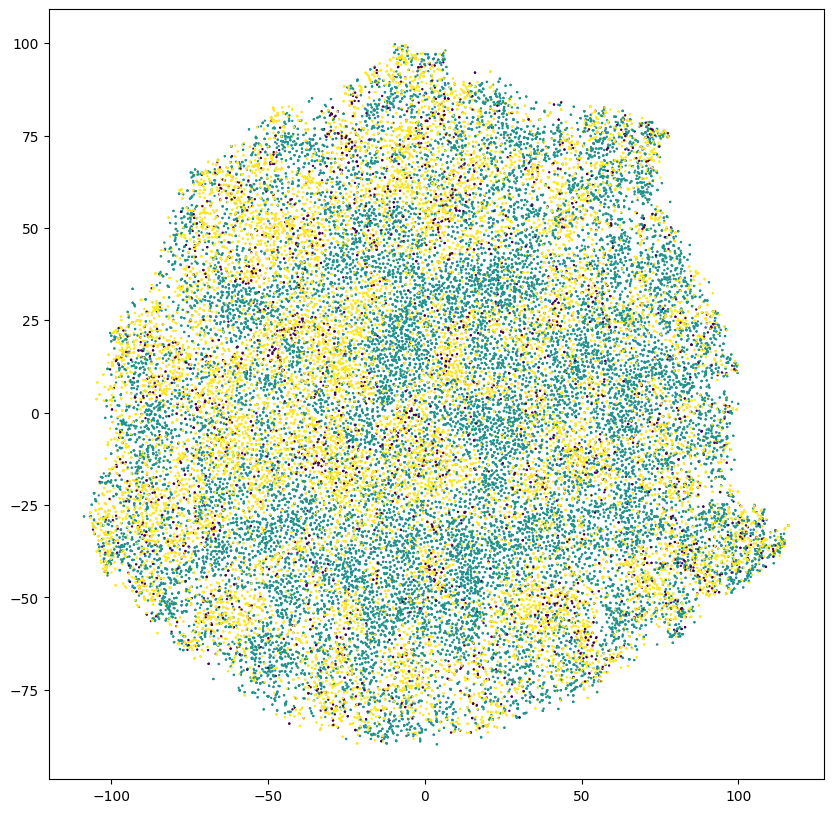

In [31]:
## ؟ points

from typing import List
from typing import List
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

def plot_docs(emb_vecs_2d: List, labels : List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """
    first_feature = emb_vecs_2d[:,0]
    second_feature = emb_vecs_2d[:,1]
    plt.scatter(first_feature, second_feature, s=0.5, c = labels)


plot_docs(docs_embedding_2d, labels)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [32]:

from typing import List
from numpy import linalg as LA

def kmeans_clustering(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """
    cluster_centers = np.random.rand(n_clusters , len(emb_vecs[0]))
   
    max_iterations = 200
    for num_of_iteration in range(max_iterations):
        cluster_solutions = []
        for vector in emb_vecs:
            all_distances = [np.dot(vector, center) / LA.norm(center) for center in cluster_centers]   ### finding all distances
            nearest_cluster = np.argmin(all_distances)
            cluster_solutions.append(nearest_cluster)
    
        new_cluster_centers = []
        for cluster_index in range(n_clusters):
            cluster_vectors = [vector for vector, assignment in zip(emb_vecs, cluster_solutions) if assignment == cluster_index]
            if len(cluster_vectors) > 0:
                new_center = np.mean(cluster_vectors, axis = 0)
                new_cluster_centers.append(new_center)
            else:
                new_cluster_centers.append(np.random.rand(len(emb_vecs[0])))

        if np.allclose(cluster_centers, new_cluster_centers):  ### we have converged
            break

        cluster_centers = new_cluster_centers

    return cluster_centers, cluster_solutions

cluster_centers, cluster_assignments = kmeans_clustering(docs_embedding_2d , 10)

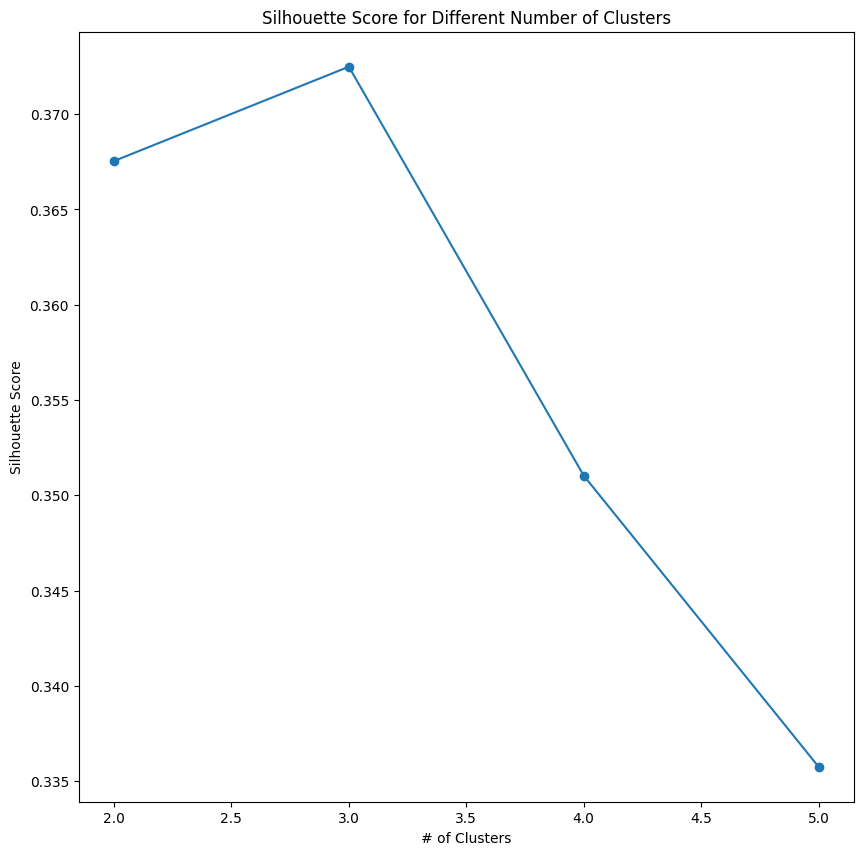

In [33]:
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def silhouette_analysis(emb_vecs):

    silhouette_scores = []
    n_clusters_range = range(2, 6)

    for n_clusters in n_clusters_range:
        centers, cluster_assignments = kmeans_clustering(emb_vecs, n_clusters)
        average_score = silhouette_score(emb_vecs, cluster_assignments)
        silhouette_scores.append(average_score)

    plt.plot(n_clusters_range, silhouette_scores, marker='o')
    plt.xlabel('# of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette score for different # of Clusters')
    plt.show()


silhouette_analysis(docs_embedding_2d)

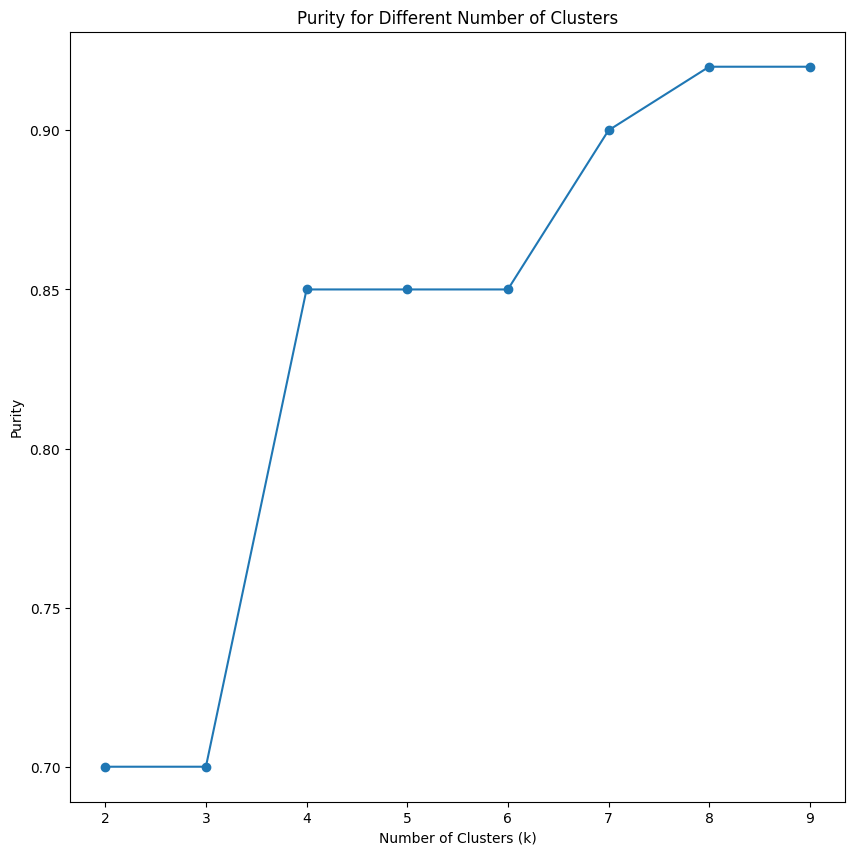

In [47]:
#TODO: plot purity for different value of k
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def get_purity(labels_true, predicted_labels):
    cm = confusion_matrix(labels_true, predicted_labels)
    for_each_label = np.amax(cm, axis=0)
    purity = np.sum(for_each_label) / np.sum(cm)
    return purity

def plot_purity(emb_vecs, actual_labels):
    purity_scores = []
    n_clusters_range = range(2, 10)

    for index, n_clusters in enumerate(n_clusters_range):
        centers, cluster_assignments = kmeans_clustering(emb_vecs, n_clusters)
        predicted_labels = cluster_assignments
        purity = get_purity(actual_labels, predicted_labels)
        purity_scores.append(purity)

    plt.plot(n_clusters_range, purity_scores, marker='o')
    plt.xlabel('# of Clusters')
    plt.ylabel('purity')
    plt.title('purity per different Number of Clusters')
    plt.show()

plot_purity(docs_embedding_2d[0:300], labels[0:300])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

<ipython-input-36-23def7d2ef30>:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='complete')


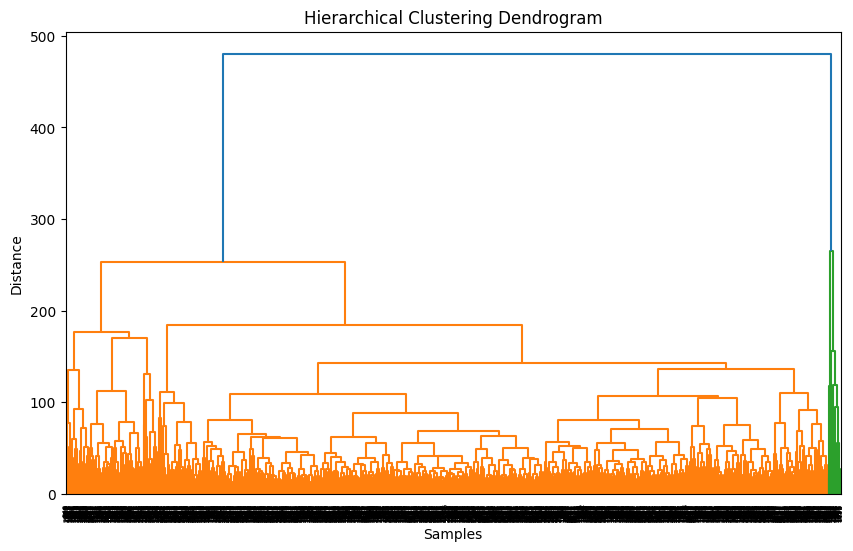

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

def hierarchical_clustering(emb_vecs):
    dist_matrix = [[np.linalg.norm(vec1 - vec2) for vec2 in emb_vecs] for vec1 in emb_vecs]

    dist_matrix = np.array(dist_matrix)

    linkage_matrix = linkage(dist_matrix, method='complete')

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.xlabel('Samples')
    plt.ylabel('Dist')
    plt.title('Hierarchical Clustering')
    plt.show()

hierarchical_clustering(docs_embedding)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [37]:
## ؟ points

from typing import List, Union
import numpy as np
from numpy.linalg import norm
from sklearn.metrics.pairwise import euclidean_distances

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
        
    """
    to_all_distances = []
    for index, dist in enumerate(euclidean_distances(emb_vecs[input_doc_index: input_doc_index+1], emb_vecs)[0]):
        to_all_distances.append((index, dist))

    
    dist_sorted_ind = [x[0] for x in sorted(to_all_distances, key = lambda x:x[1], reverse=False)]
    return dist_sorted_ind[:num_of_similar_docs]


find_similar_docs(15, 10, docs_embedding)

[15, 17719, 20773, 11436, 38584, 4077, 15005, 39331, 74, 11066]

In [38]:
import pickle
 
with open('embedding_section4.pkl', 'wb') as f:
    pickle.dump(docs_embedding, f)

with open('embedding_2d_section4.pkl', 'wb') as f:
    pickle.dump(docs_embedding_2d, f)